### Analysis of Net Promoter Score data for ABCInsurance

1. Install packages if needed

In [ ]:
!pip install pandas
!pip install  matplotlib
!pip install seaborn
!pip install nltk
!pip install wordcloud

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------------- ------------------------- 4.2/11.5 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 37.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----------------------------------- ---- 11.3/12.6 MB 58.6 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 52.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------- ----------------- 4.5/7.8 MB 24.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------

2. Load packages and resources

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import bigrams

In [121]:
# Ensure NLTK resources are available
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lundr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lundr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lundr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
# 1. Load the Dataset
# Replace 'nps_data.csv' with the path to your dataset if necessary
data = pd.read_csv('final_nps_variation_dataset.csv')

# Display the first few rows
display(data)
#print(data.head())

,Customer_ID,Region,Age,Average_Premium_Paid,NPS_Score,Years_as_Customer,Feedback
0,CUST_0001,Rest of Switzerland,47,2063.74,7,14,"Customer service was okay, nothing exceptional."
1,CUST_0002,Rest of Switzerland,37,2561.24,8,6,Claims process was average.
2,CUST_0003,Ticino,48,3019.33,8,9,Service is fine but could improve in some areas.
3,CUST_0004,Rest of Switzerland,35,2489.46,4,11,The policy is overpriced compared to competitors.
4,CUST_0005,Rest of Switzerland,30,3576.11,7,8,Claims process was average.
...,...,...,...,...,...,...,...
2437,CUST_2438,Romandie,37,3431.48,4,10,The policy is overpriced compared to competitors.
2438,CUST_2439,Romandie,35,2536.01,6,1,The premiums are too expensive for what is off...
2439,CUST_2440,Romandie,27,1297.57,1,9,Customer service was unresponsive.
2440,CUST_2441,Romandie,34,3196.47,2,6,The policy is overpriced compared to competitors.


In [137]:
# 2. Categorize Customers
# Customers are categorized into Promoters (9-10), Passives (7-8), and Detractors (0-6) based on their NPS scores.
def categorize_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

data['Category'] = data['NPS_Score'].apply(categorize_nps)


In [124]:
# Display category counts
print(data['Category'].value_counts())

Category
Detractor    1174
Passive       686
Promoter      582
Name: count, dtype: int64


C:\Users\lundr\AppData\Local\Temp\ipykernel_2288\3357967870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='viridis')


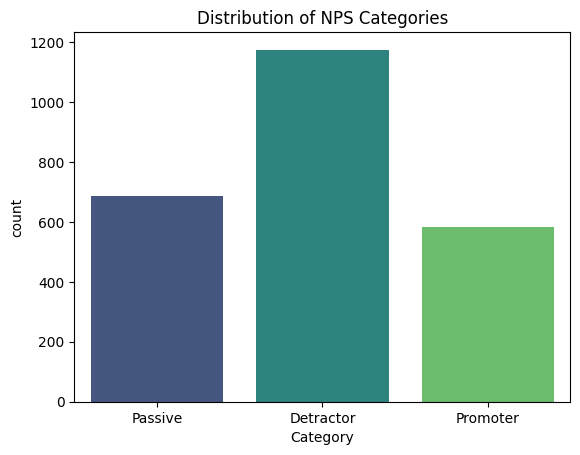

In [125]:


# 3. Visualize NPS Categories
# Create a count plot to visualize the distribution of Promoters, Passives, and Detractors.
sns.countplot(data=data, x='Category', palette='viridis')
plt.title('Distribution of NPS Categories')
plt.show()

In [140]:
aggregations = {
    "Average_Premium_Paid": "mean",  # Sum of premiums
    "Age": "mean",                 # Average age
    "Years_as_Customer": "mean"    # Average years as a customer
}

# Perform the groupby operation
grouped_data = data.groupby(["Region", "Category"]).agg(aggregations).reset_index()

# Rename the columns for clarity
grouped_data.rename(columns={
    "Average_Premium_Paid": "Average_Premium_Paid",
    "Age": "Average_Age",
    "Years_as_Customer": "Average_Years_as_Customer"
}, inplace=True)

# Display the grouped data
display(grouped_data)

,Region,Category,Average_Premium_Paid,Average_Age,Average_Years_as_Customer
0,Rest of Switzerland,Detractor,3052.415960,38.987531,9.541147
1,Rest of Switzerland,Passive,2964.711950,39.468085,9.315603
2,Rest of Switzerland,Promoter,3039.667405,40.496183,9.595420
3,Romandie,Detractor,2240.487989,34.278736,5.400862
4,Romandie,Passive,2314.832203,35.822034,5.372881
5,Ticino,Detractor,2298.297143,51.233766,7.922078
6,Ticino,Passive,2181.599231,53.265734,8.342657
7,Ticino,Promoter,2296.233481,55.356984,7.882483


In [126]:
# 4. Analyze Feedback from Detractors
# Combine feedback from detractors
detractor_feedback = ' '.join(data[data['Category'] == 'Detractor']['Feedback'])


In [127]:
# Tokenize and clean the text
words = word_tokenize(detractor_feedback.lower())
filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]


In [128]:
# Find the most common words
common_words = Counter(filtered_words).most_common(10)
print("Common Themes in Detractor Feedback:", common_words)

Common Themes in Detractor Feedback: [('claims', 451), ('premiums', 247), ('expensive', 247), ('offered', 247), ('handling', 241), ('took', 241), ('long', 241), ('policy', 238), ('overpriced', 238), ('compared', 238)]


In [129]:

# Generate bigrams (pairs of words) from detractor feedback
bigrams_list = list(bigrams(filtered_words))

# Count the most common bigrams
bigram_counts = Counter(bigrams_list).most_common(20)

print("Common Themes in Detractor Feedback:", bigram_counts)

Common Themes in Detractor Feedback: [(('premiums', 'expensive'), 247), (('expensive', 'offered'), 247), (('claims', 'handling'), 241), (('handling', 'took'), 241), (('took', 'long'), 241), (('policy', 'overpriced'), 238), (('overpriced', 'compared'), 238), (('compared', 'competitors'), 238), (('customer', 'service'), 238), (('service', 'unresponsive'), 238), (('unhappy', 'claims'), 210), (('claims', 'resolution'), 210), (('resolution', 'process'), 210), (('offered', 'premiums'), 64), (('long', 'policy'), 59), (('offered', 'policy'), 54), (('competitors', 'claims'), 53), (('long', 'customer'), 52), (('offered', 'claims'), 51), (('competitors', 'customer'), 51)]


C:\Users\lundr\AppData\Local\Temp\ipykernel_2288\3493968717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Age', palette='coolwarm')


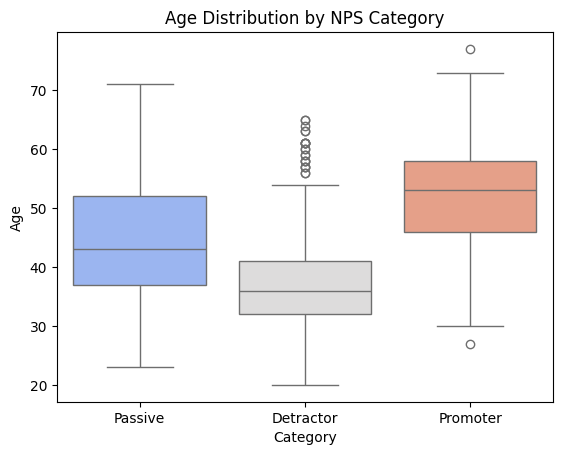

In [130]:
sns.boxplot(data=data, x='Category', y='Age', palette='coolwarm')
plt.title('Age Distribution by NPS Category')
plt.show()

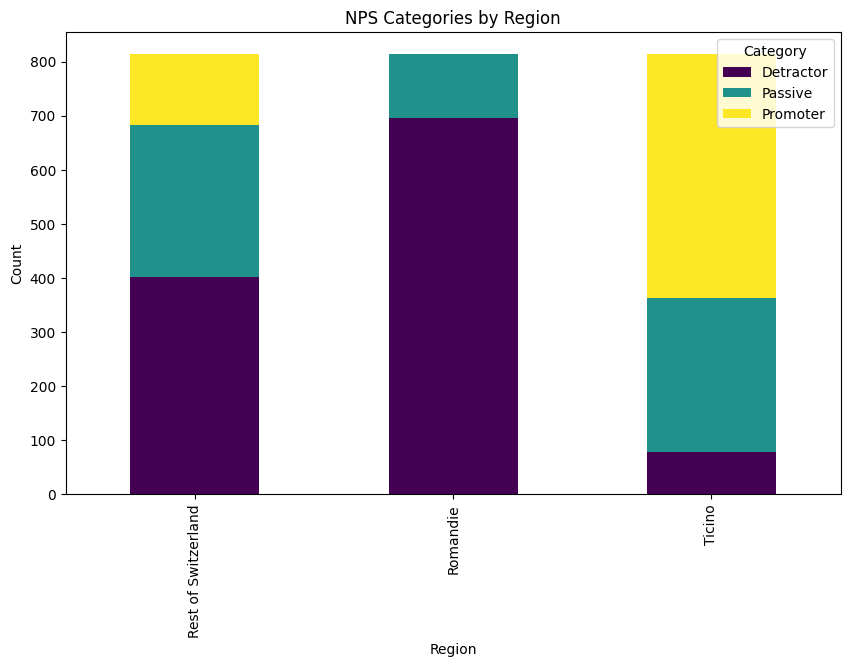

In [131]:
freq_table = data.groupby(["Region", "Category"]).size().unstack(fill_value=0)

# Plot the stacked bar chart
freq_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("NPS Categories by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

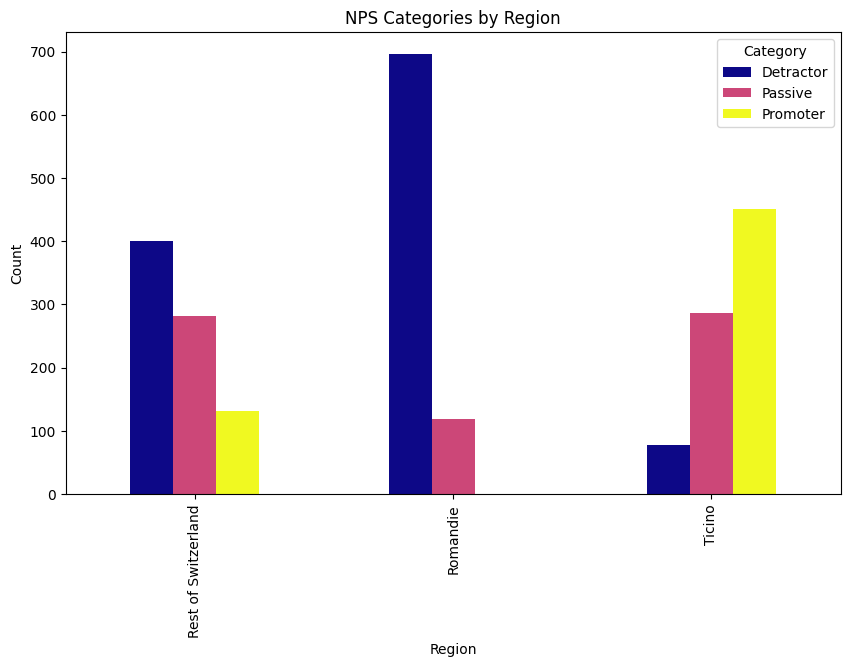

In [132]:
freq_table.plot(kind="bar", stacked=False, colormap="plasma", figsize=(10, 6))
plt.title("NPS Categories by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [138]:
aggregations = {
    "Average_Premium_Paid": "sum",  # Sum of premiums
    "Age": "mean",                 # Average age
    "Years_as_Customer": "mean"    # Average years as a customer
}

# Perform the groupby operation
grouped_data = data.groupby(["Region", "Category"]).agg(aggregations).reset_index()

# Rename the columns for clarity
grouped_data.rename(columns={
    "Average_Premium_Paid": "Total_Premiums",
    "Age": "Average_Age",
    "Years_as_Customer": "Average_Years_as_Customer"
}, inplace=True)

# Display the grouped data
display(grouped_data)

,Region,Category,Total_Premiums,Average_Age,Average_Years_as_Customer
0,Rest of Switzerland,Detractor,1224018.80,38.987531,9.541147
1,Rest of Switzerland,Passive,836048.77,39.468085,9.315603
2,Rest of Switzerland,Promoter,398196.43,40.496183,9.595420
3,Romandie,Detractor,1559379.64,34.278736,5.400862
4,Romandie,Passive,273150.20,35.822034,5.372881
5,Ticino,Detractor,176968.88,51.233766,7.922078
6,Ticino,Passive,623937.38,53.265734,8.342657
7,Ticino,Promoter,1035601.30,55.356984,7.882483


In [ ]:
f

# Plot the stacked bar chart
freq_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("NPS Categories by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

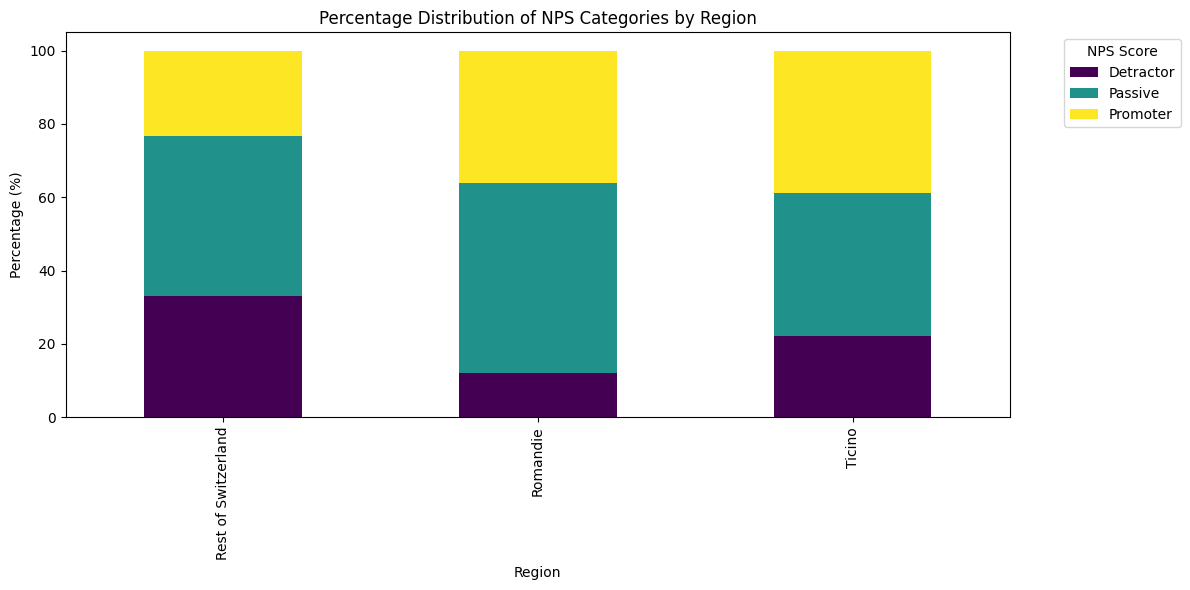

In [84]:
freq_table = data.groupby(["Region", "Category"]).size().unstack(fill_value=0)

# Normalize the data to calculate percentages
percentage_table = freq_table.div(freq_table.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
percentage_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))

# Add labels and title
plt.title("Percentage Distribution of NPS Categories by Region")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.legend(title="NPS Score", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lundr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lundr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


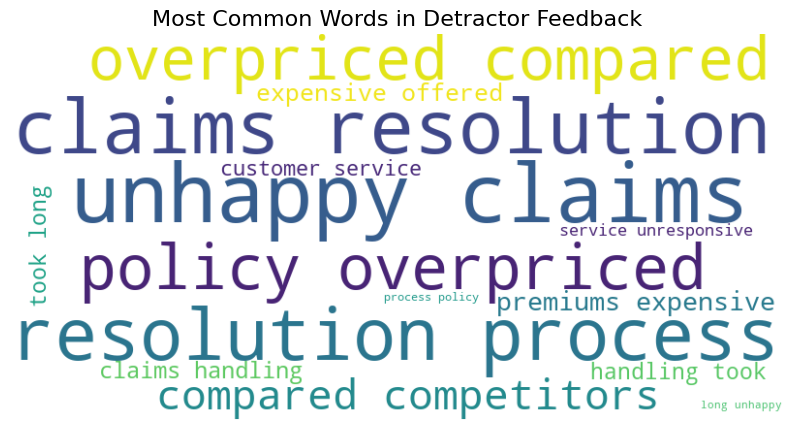

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Filter detractor feedback
detractor_feedback = ' '.join(data[data['NPS_Score'] <= 6]['Feedback'])

# Tokenize and clean the text
words = word_tokenize(detractor_feedback.lower())
filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Detractor Feedback', fontsize=16)
plt.show()


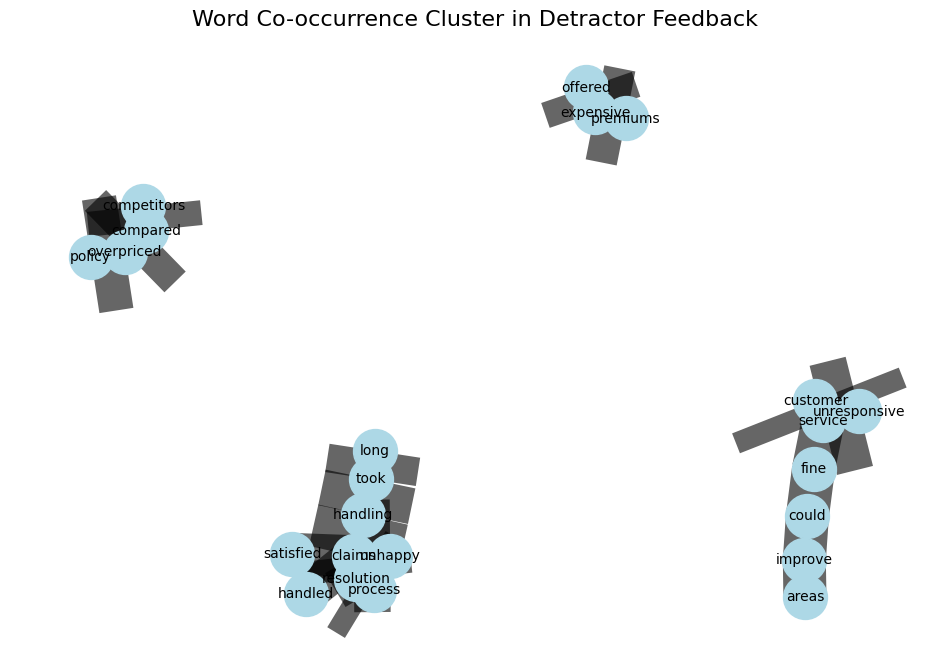

In [32]:

import networkx as nx
import matplotlib.pyplot as plt
from nltk.util import bigrams
from collections import Counter

# Generate bigrams (pairs of words) from detractor feedback
bigrams_list = list(bigrams(filtered_words))

# Count the most common bigrams
bigram_counts = Counter(bigrams_list).most_common(20)

# Create a graph
G = nx.Graph()

# Add edges with weights based on frequency
for (word1, word2), count in bigram_counts:
    G.add_edge(word1, word2, weight=count)

# Plot the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Layout for better visualization
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=[d['weight'] for (u, v, d) in G.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Word Co-occurrence Cluster in Detractor Feedback', fontsize=16)
plt.axis('off')
plt.show()

In [33]:
bigram_counts

[(('customer', 'service'), 129),
 (('policy', 'overpriced'), 82),
 (('overpriced', 'compared'), 82),
 (('compared', 'competitors'), 82),
 (('unhappy', 'claims'), 81),
 (('claims', 'resolution'), 81),
 (('resolution', 'process'), 81),
 (('service', 'unresponsive'), 81),
 (('premiums', 'expensive'), 69),
 (('expensive', 'offered'), 69),
 (('claims', 'handling'), 66),
 (('handling', 'took'), 66),
 (('took', 'long'), 66),
 (('claims', 'process'), 48),
 (('service', 'fine'), 31),
 (('fine', 'could'), 31),
 (('could', 'improve'), 31),
 (('improve', 'areas'), 31),
 (('satisfied', 'claims'), 30),
 (('claims', 'handled'), 28)]

In [110]:
# Load the dataset
data = pd.read_csv('final_nps_variation_dataset.csv')

# Display the first few rows
print(data.head())

# Add a column to categorize customers as detractors, passives, or promoters
def categorize_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

data['Category'] = data['NPS_Score'].apply(categorize_nps)

  Customer_ID               Region  Age  Average_Premium_Paid  NPS_Score  \
0   CUST_0001  Rest of Switzerland   47               2063.74          7   
1   CUST_0002  Rest of Switzerland   37               2561.24          8   
2   CUST_0003               Ticino   48               3019.33          8   
3   CUST_0004  Rest of Switzerland   35               2489.46          4   
4   CUST_0005  Rest of Switzerland   30               3576.11          7   

   Years_as_Customer                                           Feedback  
0                 14    Customer service was okay, nothing exceptional.  
1                  6                        Claims process was average.  
2                  9   Service is fine but could improve in some areas.  
3                 11  The policy is overpriced compared to competitors.  
4                  8                        Claims process was average.  


Proportion of Detractors by Region (%):
Region
Rest of Switzerland    49.262899
Romandie               85.503686
Ticino                  9.459459
dtype: float64


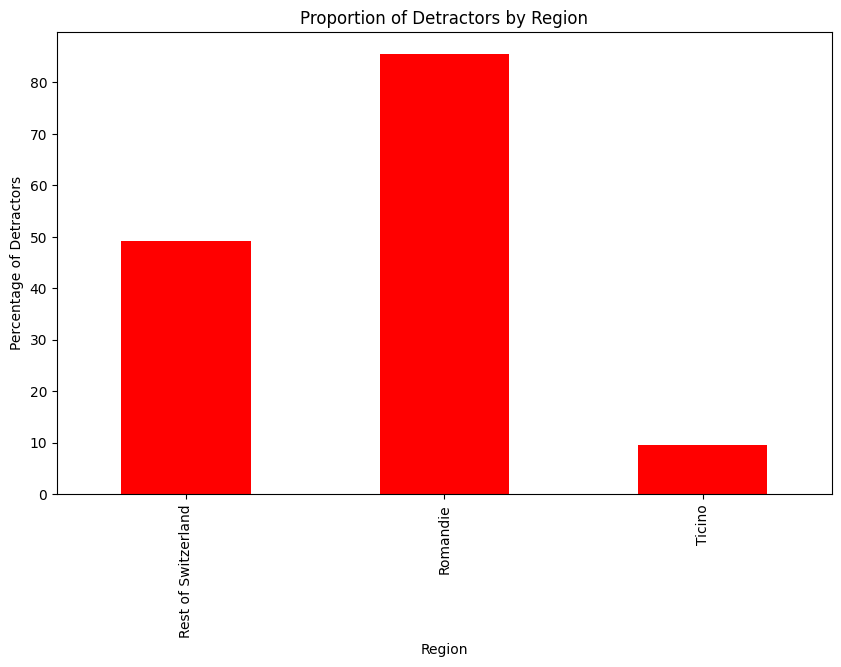

In [112]:
# Calculate the proportion of detractors by region
detractors_by_region = data[data['Category'] == 'Detractor'].groupby('Region').size() / data.groupby('Region').size() * 100
print("Proportion of Detractors by Region (%):")
print(detractors_by_region)
# Visualize the proportion of detractors by region
detractors_by_region.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Proportion of Detractors by Region')
plt.ylabel('Percentage of Detractors')
plt.xlabel('Region')
plt.show()

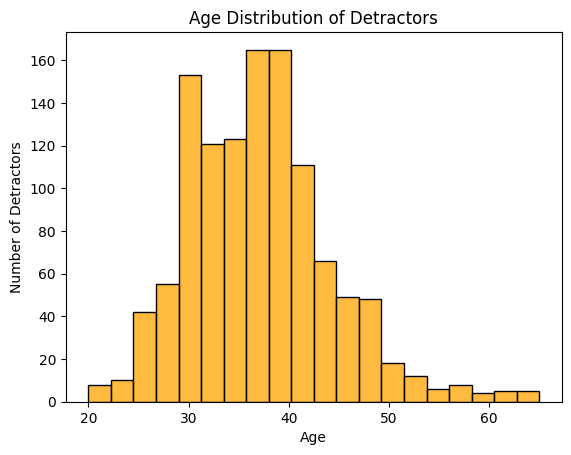

In [113]:
# Visualize the distribution of ages among detractors
sns.histplot(data[data['Category'] == 'Detractor']['Age'], kde=False, bins=20, color='orange')
plt.title('Age Distribution of Detractors')
plt.xlabel('Age')
plt.ylabel('Number of Detractors')
plt.show()


Average Premium Paid by Category:
Category
Detractor    2521.607598
Passive      2526.437828
Promoter     2463.569983
Name: Average_Premium_Paid, dtype: float64


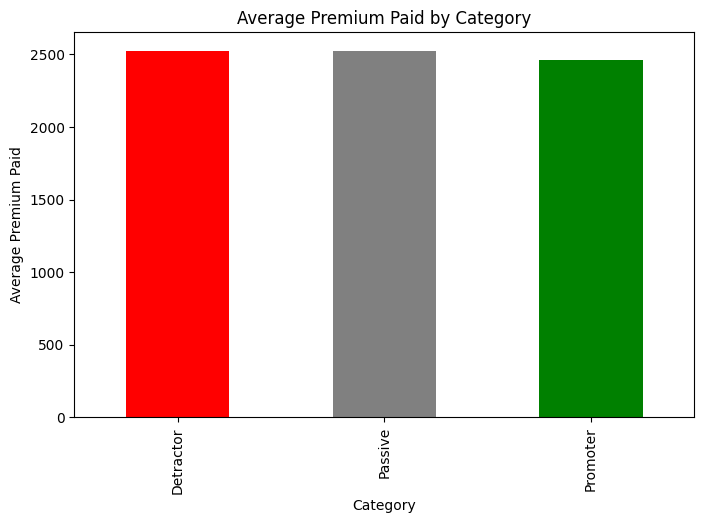

In [115]:
# Compare average premiums for detractors vs. others
avg_premiums = data.groupby('Category')['Average_Premium_Paid'].mean()
print("Average Premium Paid by Category:")
print(avg_premiums)
# Visualize the average premiums
avg_premiums.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(8, 5))
plt.title('Average Premium Paid by Category')
plt.ylabel('Average Premium Paid')
plt.xlabel('Category')
plt.show()

Most Common Words in Detractor Feedback:
[('claims', 451), ('premiums', 247), ('expensive', 247), ('offered', 247), ('handling', 241), ('took', 241), ('long', 241), ('policy', 238), ('overpriced', 238), ('compared', 238), ('competitors', 238), ('customer', 238), ('service', 238), ('unresponsive', 238), ('unhappy', 210), ('resolution', 210), ('process', 210)]


C:\Users\lundr\AppData\Local\Temp\ipykernel_2288\3020666082.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='Reds_r')


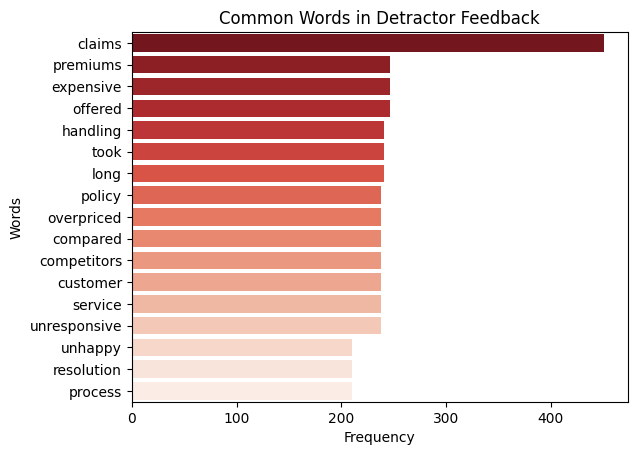

In [116]:


# Extract feedback from detractors
detractor_feedback = ' '.join(data[data['Category'] == 'Detractor']['Feedback'])

# Tokenize and clean the text
words = word_tokenize(detractor_feedback.lower())
filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]

# Find the most common words
common_words = Counter(filtered_words).most_common(20)
print("Most Common Words in Detractor Feedback:")
print(common_words)

# Visualize common themes as a bar chart
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(data=common_words_df, x='Count', y='Word', palette='Reds_r')
plt.title('Common Words in Detractor Feedback')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Most Common Bigrams in Detractor Feedback:
[(('premiums', 'expensive'), 247), (('expensive', 'offered'), 247), (('claims', 'handling'), 241), (('handling', 'took'), 241), (('took', 'long'), 241), (('policy', 'overpriced'), 238), (('overpriced', 'compared'), 238), (('compared', 'competitors'), 238), (('customer', 'service'), 238), (('service', 'unresponsive'), 238), (('unhappy', 'claims'), 210), (('claims', 'resolution'), 210), (('resolution', 'process'), 210), (('offered', 'premiums'), 64), (('long', 'policy'), 59), (('offered', 'policy'), 54), (('competitors', 'claims'), 53), (('long', 'customer'), 52), (('offered', 'claims'), 51), (('competitors', 'customer'), 51)]


C:\Users\lundr\AppData\Local\Temp\ipykernel_2288\1021804741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_bigrams_df, x='Count', y='Bigram', palette='Blues_r')


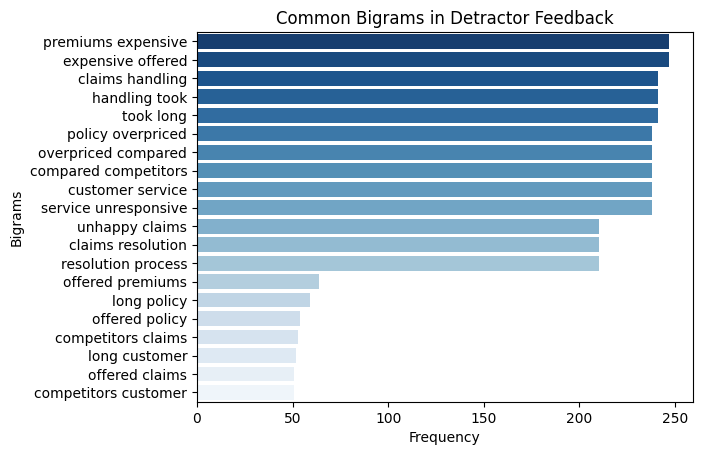

In [117]:
# Bigram analysis
bigram_list = list(bigrams(filtered_words))
common_bigrams = Counter(bigram_list).most_common(20)
print("Most Common Bigrams in Detractor Feedback:")
print(common_bigrams)

# Visualize common bigrams as a bar chart
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
common_bigrams_df['Bigram'] = common_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))
sns.barplot(data=common_bigrams_df, x='Count', y='Bigram', palette='Blues_r')
plt.title('Common Bigrams in Detractor Feedback')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()




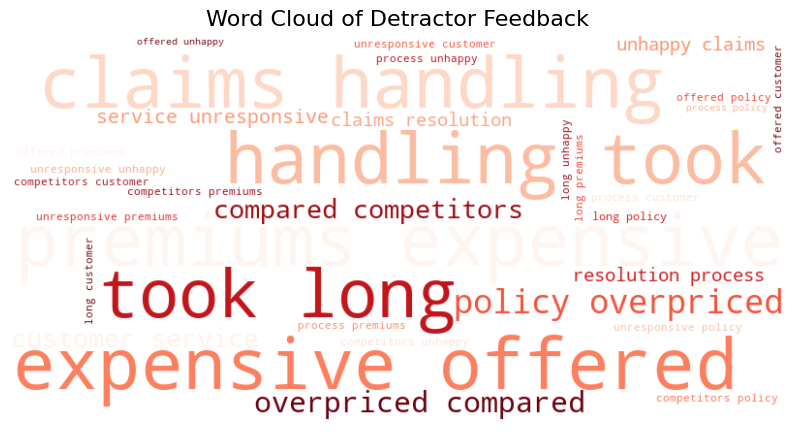

In [118]:
# Create a word cloud for detractor feedback
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Detractor Feedback', fontsize=16)
plt.show()